In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [2]:
list = pd.read_csv('music.csv')
list

,song_name,name,song_id,popularity,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Die in This Town,The Seige,0bqrFwY1HixfnusFxhYbDl,56.0,0.685,0.746,5.0,-4.558,1.0,0.2740,...,0.320,0.594,64.950,audio_features,0bqrFwY1HixfnusFxhYbDl,spotify:track:0bqrFwY1HixfnusFxhYbDl,https://api.spotify.com/v1/tracks/0bqrFwY1Hixf...,https://api.spotify.com/v1/audio-analysis/0bqr...,151500.0,4.0
1,Grand,Kane Brown,4WZ3liyYz5ZzDcL4ibAuOi,49.0,0.583,0.856,6.0,-5.446,0.0,0.0445,...,0.224,0.480,168.053,audio_features,4WZ3liyYz5ZzDcL4ibAuOi,spotify:track:4WZ3liyYz5ZzDcL4ibAuOi,https://api.spotify.com/v1/tracks/4WZ3liyYz5Zz...,https://api.spotify.com/v1/audio-analysis/4WZ3...,178973.0,4.0
2,Grand,Kane Brown,4WZ3liyYz5ZzDcL4ibAuOi,49.0,0.583,0.856,6.0,-5.446,0.0,0.0445,...,0.224,0.480,168.053,audio_features,4WZ3liyYz5ZzDcL4ibAuOi,spotify:track:4WZ3liyYz5ZzDcL4ibAuOi,https://api.spotify.com/v1/tracks/4WZ3liyYz5Zz...,https://api.spotify.com/v1/audio-analysis/4WZ3...,178973.0,4.0
3,Statement,NEFFEX,39kS4TwUw5yTJETWusq2VS,54.0,0.827,0.791,1.0,-6.030,1.0,0.0841,...,0.166,0.720,95.000,audio_features,39kS4TwUw5yTJETWusq2VS,spotify:track:39kS4TwUw5yTJETWusq2VS,https://api.spotify.com/v1/tracks/39kS4TwUw5yT...,https://api.spotify.com/v1/audio-analysis/39kS...,186947.0,4.0
4,Statement,NEFFEX,39kS4TwUw5yTJETWusq2VS,54.0,0.827,0.791,1.0,-6.030,1.0,0.0841,...,0.166,0.720,95.000,audio_features,39kS4TwUw5yTJETWusq2VS,spotify:track:39kS4TwUw5yTJETWusq2VS,https://api.spotify.com/v1/tracks/39kS4TwUw5yT...,https://api.spotify.com/v1/audio-analysis/39kS...,186947.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14217,Crossed The Line,Linn Sandin,1j3N4TCykSmXy12iUiMQWk,57.0,0.533,0.723,2.0,-7.076,0.0,0.1990,...,0.297,0.388,176.096,audio_features,1j3N4TCykSmXy12iUiMQWk,spotify:track:1j3N4TCykSmXy12iUiMQWk,https://api.spotify.com/v1/tracks/1j3N4TCykSmX...,https://api.spotify.com/v1/audio-analysis/1j3N...,147273.0,4.0
14218,Crossed The Line,Vosai,1j3N4TCykSmXy12iUiMQWk,57.0,0.533,0.723,2.0,-7.076,0.0,0.1990,...,0.297,0.388,176.096,audio_features,1j3N4TCykSmXy12iUiMQWk,spotify:track:1j3N4TCykSmXy12iUiMQWk,https://api.spotify.com/v1/tracks/1j3N4TCykSmX...,https://api.spotify.com/v1/audio-analysis/1j3N...,147273.0,4.0
14219,Crossed The Line,Facading,1j3N4TCykSmXy12iUiMQWk,57.0,0.533,0.723,2.0,-7.076,0.0,0.1990,...,0.297,0.388,176.096,audio_features,1j3N4TCykSmXy12iUiMQWk,spotify:track:1j3N4TCykSmXy12iUiMQWk,https://api.spotify.com/v1/tracks/1j3N4TCykSmX...,https://api.spotify.com/v1/audio-analysis/1j3N...,147273.0,4.0
14220,Crossed The Line,Linn Sandin,1j3N4TCykSmXy12iUiMQWk,57.0,0.533,0.723,2.0,-7.076,0.0,0.1990,...,0.297,0.388,176.096,audio_features,1j3N4TCykSmXy12iUiMQWk,spotify:track:1j3N4TCykSmXy12iUiMQWk,https://api.spotify.com/v1/tracks/1j3N4TCykSmX...,https://api.spotify.com/v1/audio-analysis/1j3N...,147273.0,4.0


In [3]:
n_list = list.select_dtypes(include='number')

In [4]:
transformer = StandardScaler().fit(n_list)
X_prep=transformer.transform(n_list)
pd.DataFrame(X_prep,columns=n_list.columns).head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1.206172,0.532570,0.409030,-0.081764,0.776562,0.905832,1.292461,-0.954485,-0.752523,0.272635,0.815706,-1.727112,-0.098726,0.227886
1,0.917832,0.075446,0.773831,0.210336,0.682448,-1.103957,-0.610425,-0.976080,-0.752523,-0.111801,0.381042,1.567987,0.052318,0.227886
2,0.917832,0.075446,0.773831,0.210336,0.682448,-1.103957,-0.610425,-0.976080,-0.752523,-0.111801,0.381042,1.567987,0.052318,0.227886
3,1.123789,1.168959,0.558267,-1.250167,0.620553,0.905832,-0.282084,-0.881680,-0.752523,-0.344064,1.296124,-0.766735,0.096158,0.227886
4,1.123789,1.168959,0.558267,-1.250167,0.620553,0.905832,-0.282084,-0.881680,-0.752523,-0.344064,1.296124,-0.766735,0.096158,0.227886


In [5]:
#Had a lot of warning for next 2 graphs, removed it not to have a lot of red messages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

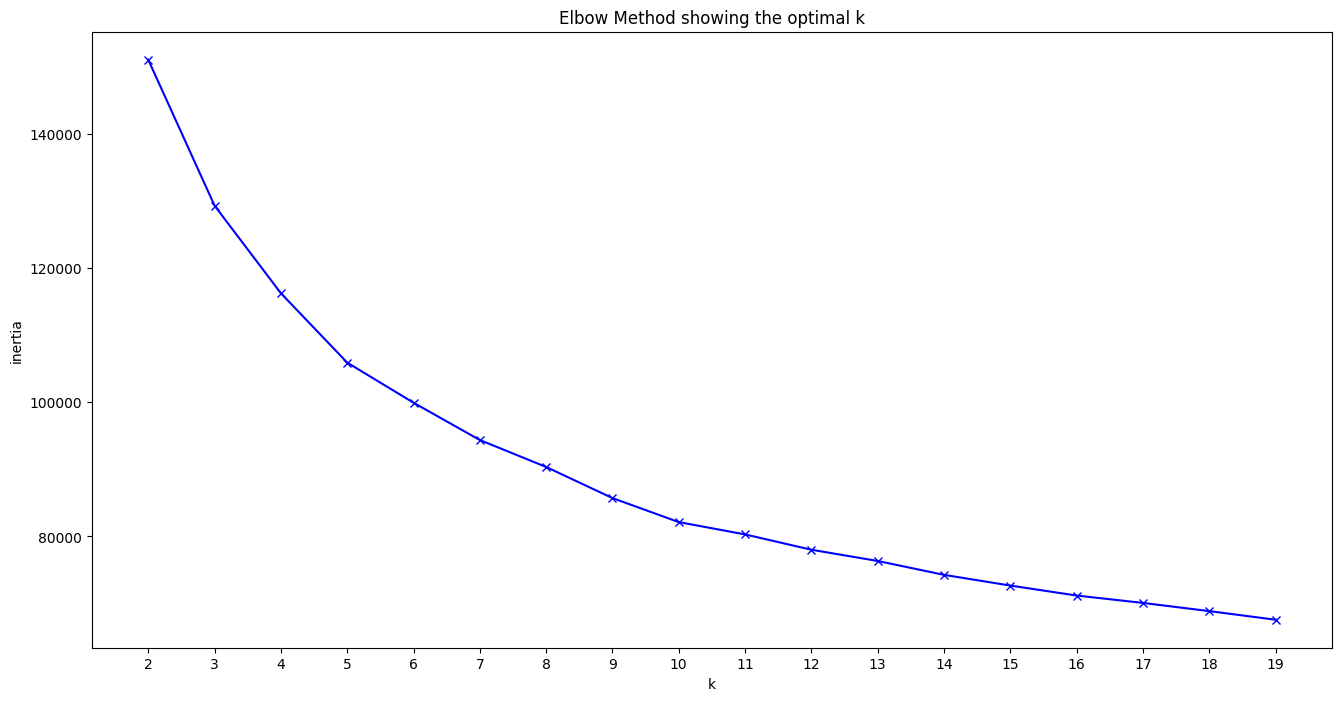

In [6]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [ ]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

In [ ]:
kmeans = KMeans(n_clusters=20, random_state=1234)
kmeans.fit(X_prep)

In [ ]:
clusters = kmeans.predict(X_prep)
pd.Series(clusters).value_counts().sort_index()

In [ ]:
list['cluster']= clusters
list

In [ ]:
list_clusters = list[['song_name', 'name', 'song_id', 'cluster']]
list_clusters

In [ ]:
list_clusters = list_clusters.rename(columns={'name': 'singer'})

In [ ]:
list_clusters

In [ ]:
list_clusters.to_csv('cluster_list.csv', index=False)

After checking this dataset I found out that it had too many duplicates, so I decided to drop some, as in that case it should be having a huge influence on the result in the end, but I still have 2 scv files with dropped duplicates and not for further testing.

In [ ]:
list_clusters.drop_duplicates(inplace=True)
list_clusters.reset_index(drop=True, inplace=True)

In [ ]:
list_clusters

In [ ]:
cluster_counts = list_clusters['cluster'].value_counts()
cluster_counts

In [ ]:
list_clusters.to_csv('cluster_list_dropped_d.csv', index=False)